In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from aps_ai.beamline34IDC.util.shadow.common import \
    plot_shadow_beam_spatial_distribution, get_shadow_beam_spatial_distribution
import beamline34IDC.optimization.common as opt_common
from aps_ai.beamline34IDC.optimization.scipy_nelder_mead import ScipyOptimizer
from aps_ai.beamline34IDC.optimization.skopt_gp import SkoptGaussianProcessOptimizer, SkoptDiscreteGPOptimizer
from aps_ai.beamline34IDC.optimization.display_utils import LivePlotCallback

import beamline34IDC.optimization.movers as movers
from aps_ai.beamline34IDC.util import clean_up
import matplotlib.pyplot as plt
import numpy as np
import scipy
from tqdm import tqdm
import glob
import shutil

In [3]:
%matplotlib inline

In [4]:
DEFAULT_RANDOM_SEED = np.random.randint(100000)
print(DEFAULT_RANDOM_SEED)

91308


In [5]:
base_dir = '/gpfs/fs1/home/skandel/code/oasys_ml/ML_Control_System/'
orig_work_dir = f'{base_dir}/work_directory'
temp_work_dir = f'{base_dir}/tmp_work_dir_{DEFAULT_RANDOM_SEED}'

In [6]:
os.mkdir(temp_work_dir)

In [7]:
dat_files = glob.glob(f'{orig_work_dir}/*.dat') + glob.glob(f'{orig_work_dir}/*.ini')
for df in dat_files:
    shutil.copy(df, temp_work_dir)

In [8]:
os.chdir(temp_work_dir)

In [9]:
input_beam_path = "primary_optics_system_beam.dat"

In [10]:
move_motors = ['vkb_1']

In [11]:
motors_str = move_motors[0] if len(move_motors) == 1 else '_'.join(move_motors)
fig_save_path = f'{orig_work_dir}/figures/{motors_str}/'
if not os.path.isdir(fig_save_path):
    os.mkdir(fig_save_path)

In [12]:
focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)

In [13]:
initial_absolute_positions = np.array(movers.get_absolute_positions(focusing_system, move_motors))
print(initial_absolute_positions)

[0.1425]


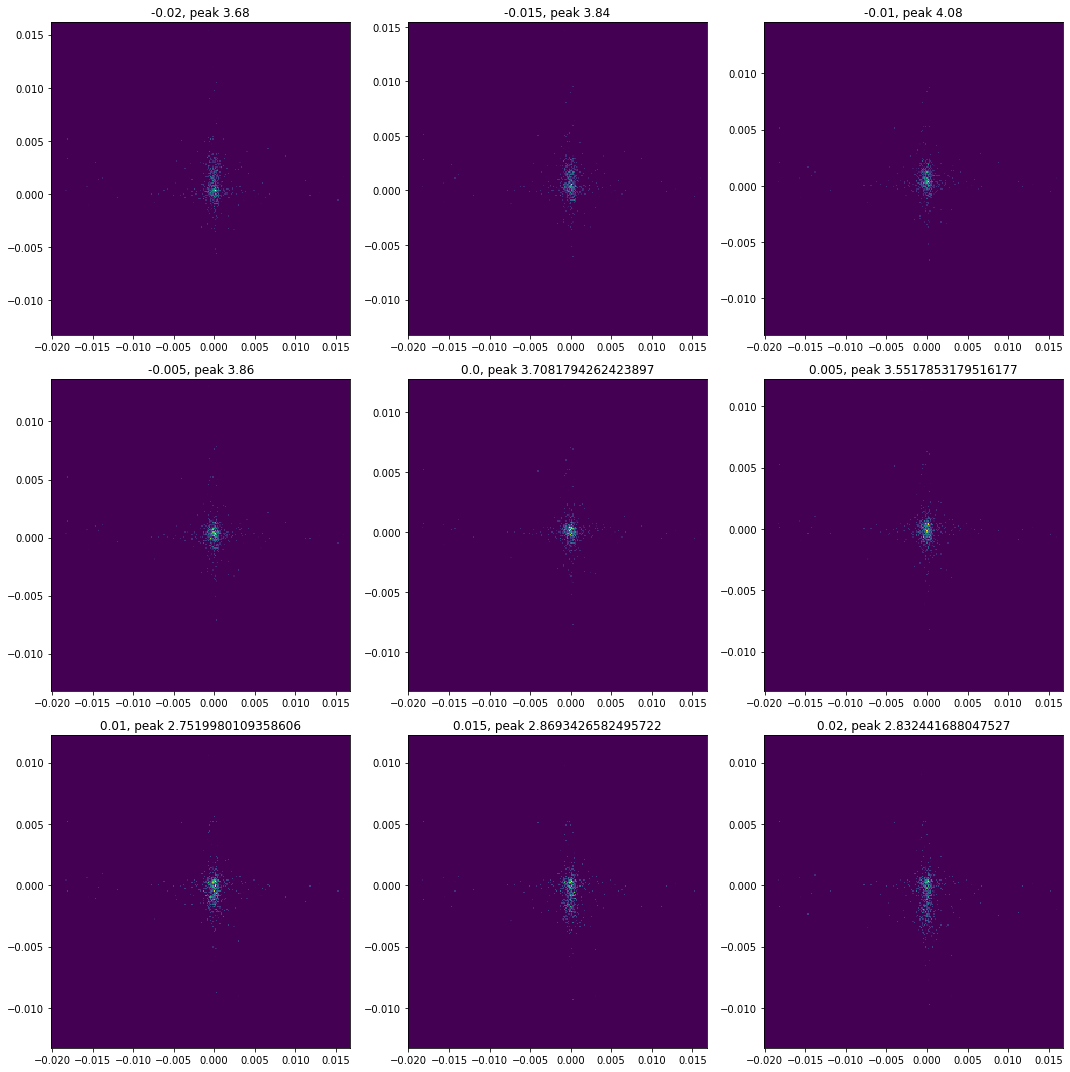

In [14]:
fig, axs = plt.subplots(3, 3, figsize=[15, 15])
axs = axs.flatten()

m = 0.005

for i in range(5):
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         translations=initial_absolute_positions + m * i, 
                                         movement='absolute')
    beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    axs[4 + i].pcolormesh(hist.hh, hist.vv, hist.data_2D)
    pk = dw.get_parameter('peak_intensity')
    axs[4 + i].set_title(f'{m * i}, peak {pk}')
    
    if i == 0: continue
    
    focusing_system = movers.move_motors(focusing_system, move_motors, 
                                         translations=initial_absolute_positions - m * i, 
                                         movement='absolute')
    beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    axs[4 - i].pcolormesh(hist.hh, hist.vv, hist.data_2D)
    
    pk = dw.get_parameter('peak_intensity')
    axs[4 - i].set_title(f'{-m * i}, peak {pk:2.2f}')
plt.tight_layout()
    
    

  0%|          | 0/5 [00:00<?, ?it/s]

Random guess [-0.013041759671391272] has loss 0.005830339394585665
Initial motor position is [0.12945824]
Initial loss is 0.005830339394585665
motors ['vkb_1'] trans [0.04730189] current loss 0.002768099586449259


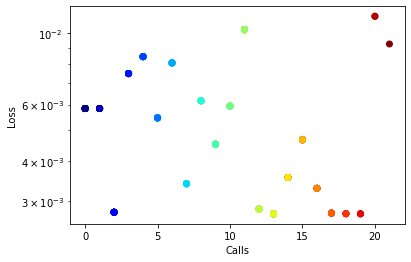

motors ['vkb_1'] trans [-0.00776226] current loss 0.007492261355799435
motors ['vkb_1'] trans [-0.02224518] current loss 0.008462732087045954
motors ['vkb_1'] trans [0.00122298] current loss 0.0054510103677798405
motors ['vkb_1'] trans [-0.01459418] current loss 0.008090216525023227
motors ['vkb_1'] trans [0.04356589] current loss 0.0033979137621622034
motors ['vkb_1'] trans [0.03348835] current loss 0.006165061301144432
motors ['vkb_1'] trans [0.00597718] current loss 0.004512968863804218
motors ['vkb_1'] trans [0.03795135] current loss 0.005930480468328137
motors ['vkb_1'] trans [-0.03910129] current loss 0.010267665585832204
motors ['vkb_1'] trans [0.05] current loss 0.002830281394340485
motors ['vkb_1'] trans [0.04792295] current loss 0.0027354579657899968
motors ['vkb_1'] trans [0.0178663] current loss 0.003552835489792729
motors ['vkb_1'] trans [0.02353929] current loss 0.004658496872078262
motors ['vkb_1'] trans [0.0128608] current loss 0.003287126397803611
motors ['vkb_1'] tran

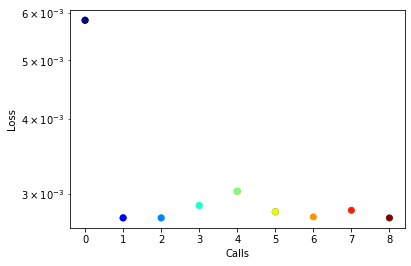

[ final_simplex: (array([[0.04792295],
       [0.04792295]]), array([0.00273613, 0.00273637]))
           fun: 0.002736127948202615
       message: 'Optimization terminated successfully.'
          nfev: 7
           nit: 3
        status: 0
       success: True
             x: array([0.04792295])]


 20%|██        | 1/5 [01:30<06:01, 90.43s/it]

Test 0 success True
Random guess [0.01416671728632856] has loss 0.005293621229447647
Initial motor position is [0.15666672]
Initial loss is 0.005293621229447647
motors ['vkb_1'] trans [0.00282856] current loss 0.005740731584961616


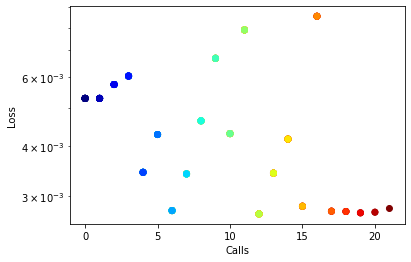

motors ['vkb_1'] trans [0.00503226] current loss 0.006031326531324143
motors ['vkb_1'] trans [0.03111293] current loss 0.003440056852617114
motors ['vkb_1'] trans [0.04263891] current loss 0.004288784784445844
motors ['vkb_1'] trans [0.01963502] current loss 0.00275273877200413
motors ['vkb_1'] trans [0.01608548] current loss 0.0034086641327647784
motors ['vkb_1'] trans [0.01334764] current loss 0.004645305748000861
motors ['vkb_1'] trans [-0.03090039] current loss 0.006687985323824454
motors ['vkb_1'] trans [0.04390049] current loss 0.004312236527691873
motors ['vkb_1'] trans [-0.03739256] current loss 0.007891574005535378
motors ['vkb_1'] trans [0.02054001] current loss 0.0026995006220725403
motors ['vkb_1'] trans [-0.01360805] current loss 0.0034242730270246345
motors ['vkb_1'] trans [-0.01962484] current loss 0.004175890360953941
motors ['vkb_1'] trans [0.0221769] current loss 0.0028232347649861404
motors ['vkb_1'] trans [-0.05] current loss 0.008547195315223102
motors ['vkb_1'] tr

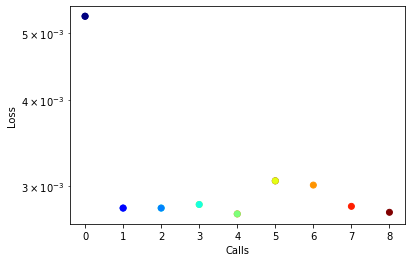

[ final_simplex: (array([[0.01951301],
       [0.01951301]]), array([0.00273681, 0.00275165]))
           fun: 0.0027368119942824095
       message: 'Optimization terminated successfully.'
          nfev: 7
           nit: 3
        status: 0
       success: True
             x: array([0.01951301])]


 40%|████      | 2/5 [03:04<04:37, 92.47s/it]

Test 1 success True
Random guess [0.0011795977479082953] has loss 0.0032303973791899428
Initial motor position is [0.1436796]
Initial loss is 0.0032303973791899428
motors ['vkb_1'] trans [-0.00265065] current loss 0.0034053585197757557


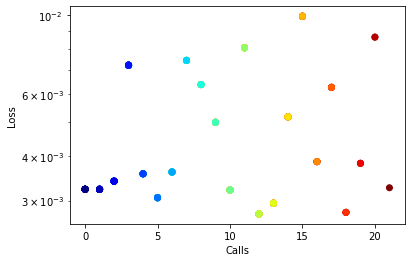

motors ['vkb_1'] trans [-0.02051098] current loss 0.007224296520121717
motors ['vkb_1'] trans [0.04604605] current loss 0.0035727378826038055
motors ['vkb_1'] trans [0.03095439] current loss 0.0030587029139605678
motors ['vkb_1'] trans [0.04622114] current loss 0.003613344605929542
motors ['vkb_1'] trans [-0.02171551] current loss 0.007451598500259879
motors ['vkb_1'] trans [-0.01649633] current loss 0.006371217542396966
motors ['vkb_1'] trans [-0.0107058] current loss 0.004988025574064312
motors ['vkb_1'] trans [-0.00028673] current loss 0.003215408805865196
motors ['vkb_1'] trans [-0.02619954] current loss 0.008088792614778345
motors ['vkb_1'] trans [0.03373268] current loss 0.0027538078416112005
motors ['vkb_1'] trans [0.03742468] current loss 0.0029522987777534843
motors ['vkb_1'] trans [0.0121128] current loss 0.005167209890428624
motors ['vkb_1'] trans [-0.05] current loss 0.00992187542564282
motors ['vkb_1'] trans [0.04999973] current loss 0.003864888825798437
motors ['vkb_1'] t

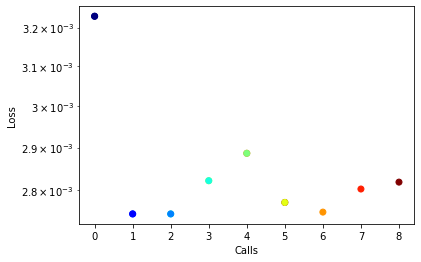

[ final_simplex: (array([[0.03373268],
       [0.03373268]]), array([0.00274596, 0.00281868]))
           fun: 0.0027459606910410573
       message: 'Optimization terminated successfully.'
          nfev: 7
           nit: 3
        status: 0
       success: True
             x: array([0.03373268])]


 60%|██████    | 3/5 [04:29<02:58, 89.08s/it]

Test 2 success True
Random guess [-0.012744819245316693] has loss 0.005777591108866183
Initial motor position is [0.12975518]
Initial loss is 0.005777591108866183
motors ['vkb_1'] trans [0.00133268] current loss 0.005430438711253156


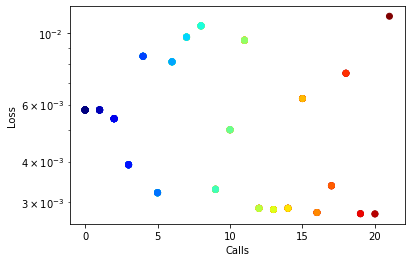

motors ['vkb_1'] trans [0.01953795] current loss 0.003911509618979086
motors ['vkb_1'] trans [-0.02251825] current loss 0.008466105106523934
motors ['vkb_1'] trans [0.04369838] current loss 0.003205308605836076
motors ['vkb_1'] trans [-0.0185513] current loss 0.008139754635346606
motors ['vkb_1'] trans [-0.03461338] current loss 0.009706197496829754
motors ['vkb_1'] trans [-0.04342319] current loss 0.01051511200101067
motors ['vkb_1'] trans [0.0162612] current loss 0.003284549559849064
motors ['vkb_1'] trans [0.00319646] current loss 0.005017578388032531
motors ['vkb_1'] trans [-0.03242765] current loss 0.00949155262446051
motors ['vkb_1'] trans [0.05] current loss 0.0028694224942599857
motors ['vkb_1'] trans [0.04994659] current loss 0.002844656243758731


/home/skandel/.conda/envs/oasys_env/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


motors ['vkb_1'] trans [0.05] current loss 0.0028698773416941225
motors ['vkb_1'] trans [0.03481838] current loss 0.0062670665281295305
motors ['vkb_1'] trans [0.04757515] current loss 0.002784255827222387
motors ['vkb_1'] trans [0.01133959] current loss 0.0033687687377562774
motors ['vkb_1'] trans [-0.00815891] current loss 0.007503675533697934
motors ['vkb_1'] trans [0.04785497] current loss 0.0027612419996371975
motors ['vkb_1'] trans [0.04790096] current loss 0.002756716369075796
motors ['vkb_1'] trans [-0.04998542] current loss 0.011257872174483501
Loss is 0.002756716369075796 for x [0.04790095699694917] and min acceptable value is 0.0005
Solution is not acceptable.
Solution is [0.04790095699694917]
Trying Nelder-Mead from minimum position
Initial loss is 0.005777591108866183
initial guess is [0.04790096]


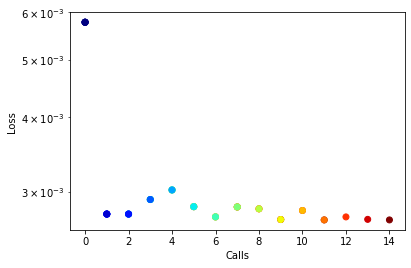

[ final_simplex: (array([[0.04741446],
       [0.04741446]]), array([0.00268918, 0.00268918]))
           fun: 0.0026891793533239347
       message: 'Optimization terminated successfully.'
          nfev: 13
           nit: 6
        status: 0
       success: True
             x: array([0.04741446])]


 80%|████████  | 4/5 [06:18<01:36, 96.93s/it]

Test 3 success True
Random guess [0.00876514722570313] has loss 0.0043163320313569994
Initial motor position is [0.15126515]
Initial loss is 0.0043163320313569994
motors ['vkb_1'] trans [-0.04516121] current loss 0.0085656788136665


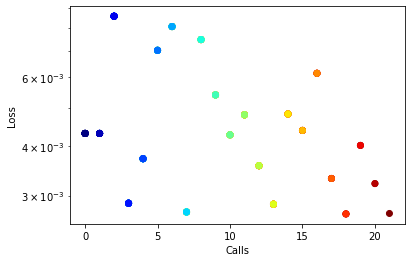

motors ['vkb_1'] trans [0.02397658] current loss 0.002870040503417745
motors ['vkb_1'] trans [-0.01259064] current loss 0.0037240378490281307
motors ['vkb_1'] trans [-0.02698046] current loss 0.007017513770758958
motors ['vkb_1'] trans [-0.03450154] current loss 0.008064465851147964
motors ['vkb_1'] trans [0.02575832] current loss 0.0027265133628877874
motors ['vkb_1'] trans [-0.02941471] current loss 0.007473333318426692
motors ['vkb_1'] trans [-0.02011122] current loss 0.00540690412597945
motors ['vkb_1'] trans [-0.015398] current loss 0.004280822561149852
motors ['vkb_1'] trans [-0.01744634] current loss 0.0048126564345326375
motors ['vkb_1'] trans [0.0384905] current loss 0.0035745099811459683
motors ['vkb_1'] trans [0.0284322] current loss 0.0028537488386749933
motors ['vkb_1'] trans [0.00256653] current loss 0.004836336555151224
motors ['vkb_1'] trans [0.05] current loss 0.00439339250238765
motors ['vkb_1'] trans [0.01574036] current loss 0.006135936632267073
motors ['vkb_1'] tra

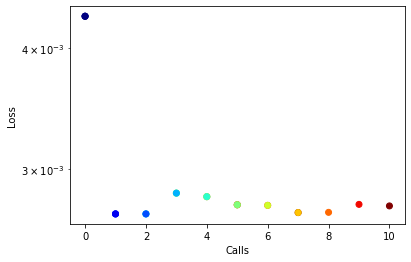

[ final_simplex: (array([[0.02597792],
       [0.02597792]]), array([0.00269609, 0.00274794]))
           fun: 0.0026960923571394246
       message: 'Optimization terminated successfully.'
          nfev: 9
           nit: 4
        status: 0
       success: True
             x: array([0.02597792])]


100%|██████████| 5/5 [07:48<00:00, 93.79s/it]

Test 4 success True


In [15]:
N_RUNS = 5

initial_centroids = []
initial_out_beams = []
absolute_movements = []

start_guesses = []
overall_successes = []
final_centroids = []
final_out_beams = []



for outer in tqdm(range(N_RUNS)):
    focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)
    opt_trial = SkoptGaussianProcessOptimizer(focusing_system, 
                                              motor_types=move_motors, 
                                              random_seed=DEFAULT_RANDOM_SEED, 
                                              loss_parameters=['centroid', 'fwhm'],
                                              loss_min_value=5e-4,
                                              use_gaussian_fit=True)
    random_inits = opt_trial.get_random_init()
    
    absolute_movements.append(initial_absolute_positions + random_inits)
    
    print("Initial motor position is", absolute_movements[-1])
    opt_trial.initial_motor_positions =  absolute_movements[-1]
    #deltax_callback = DeltaXStopper(configs.DEFAULT_MOTOR_TOLERANCES['hkb_4'] / configs.DEFAULT_MOTOR_RESOLUTIONS['hkb_4'])
    #deltay_callback = DeltaYStopper(configs.DEFAULT_LOSS_TOLERANCES['centroid'])
    plot_callback = LivePlotCallback(opt_trial)
    opt_trial.set_optimizer_options(callback = [plot_callback.call], xi=5e-4, kappa=0.1, n_calls=20, bounds=[-0.05, 0.05])
    opt_results, guesses, solution, success = opt_trial.trials(verbose=True)
    print("Solution is", solution)
    plot_callback.close()
    
    if not success:
        print('Trying Nelder-Mead from minimum position')
        focusing_system = opt_common.reinitialize(input_beam_path=input_beam_path)
        focusing_system = movers.move_motors(focusing_system, move_motors, 
                                             absolute_movements[-1],
                                             movement='absolute')
        opt_trial = ScipyOptimizer(focusing_system, 
                                   motor_types=move_motors, 
                                   random_seed=DEFAULT_RANDOM_SEED, 
                                   loss_parameters=['centroid', 'fwhm'],
                                   loss_min_value=5e-4,
                                   use_gaussian_fit=True)
        plot_callback = LivePlotCallback(opt_trial)
        opt_trial.set_optimizer_options(callback = plot_callback.call)
        opt_results, guesses, solution, success = opt_trial.trials(1, initial_guess=solution[0],
                                                                   verbose=False, 
                                                                   accept_all_solutions=True)
        focusing_system = opt_trial.focusing_system
        plot_callback.close()
        print(opt_results)
    start_guesses.append(guesses)
    overall_successes.append(success)
    centroid, out_beam, *_ = opt_common.get_centroid_distance(focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    final_centroids.append(centroid)
    final_out_beams.append(out_beam)
    print(f'Test {outer} success {success}')

In [16]:
initial_out_beams = []
initial_hists = []
initial_dws = []
for mov in absolute_movements:
    focusing_system = movers.move_motors(focusing_system, move_motors, mov, movement='absolute')
    beam, hist, dw = opt_common.get_beam_hist_dw(focusing_system=focusing_system, random_seed=DEFAULT_RANDOM_SEED)
    initial_out_beams.append(beam)
    initial_hists.append(hist)
    initial_dws.append(dw)

In [17]:
initial_peaks = [dw.get_parameter('peak_intensity') for dw in initial_dws]
initial_h_fwhms = [dw.get_parameter('h_fwhm') for dw in initial_dws]
initial_v_fwhms = [dw.get_parameter('v_fwhm') for dw in initial_dws]

In [18]:
final_hists_dws = [get_shadow_beam_spatial_distribution(ob) for ob in final_out_beams]
final_hists, final_dws = zip(*final_hists_dws)

In [19]:
final_peaks = [dw.get_parameter('peak_intensity') for dw in final_dws]
final_h_fwhms = [dw.get_parameter('h_fwhm') for dw in final_dws]
final_v_fwhms = [dw.get_parameter('v_fwhm') for dw in final_dws]

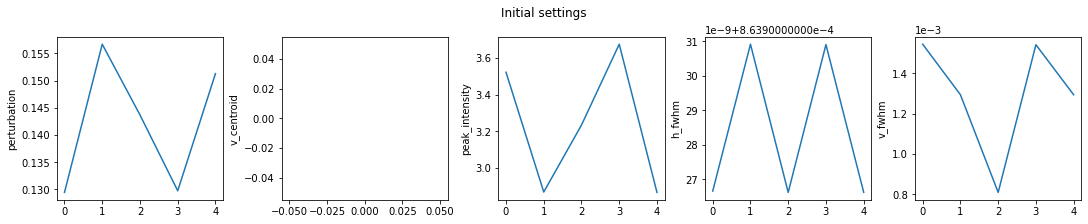

In [20]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes[0].plot(absolute_movements)
axes[0].set_ylabel('perturbation')

axes[1].plot(initial_centroids)
axes[1].set_ylabel('v_centroid')

axes[2].plot(initial_peaks)
axes[2].set_ylabel('peak_intensity')

axes[3].plot(initial_h_fwhms)
axes[3].set_ylabel('h_fwhm')
axes[3].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[4].plot(initial_v_fwhms)
axes[4].set_ylabel('v_fwhm')
axes[4].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('Initial settings')
fig.savefig(f'{fig_save_path}/initial_metrics.png', bbox_inches='tight')

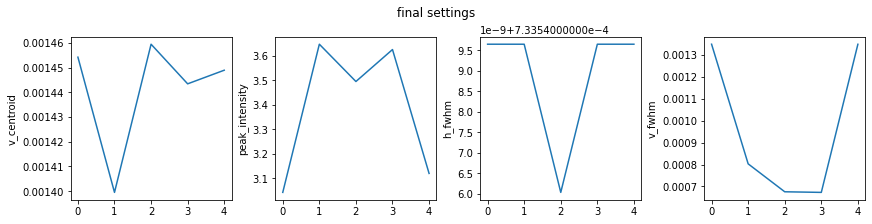

In [21]:
fig, axes = plt.subplots(1, 4, figsize=[12,3], constrained_layout=True)

axes[0].plot(final_centroids)
axes[0].set_ylabel('v_centroid')

axes[1].plot(final_peaks)
axes[1].set_ylabel('peak_intensity')

axes[2].plot(final_h_fwhms)
axes[2].set_ylabel('h_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))


axes[3].plot(final_v_fwhms)
axes[3].set_ylabel('v_fwhm')
axes[2].ticklabel_format(style='sci', scilimits=(-3, -5))

fig.suptitle('final settings')
fig.savefig(f'{fig_save_path}/final_metrics.png', bbox_inches='tight')

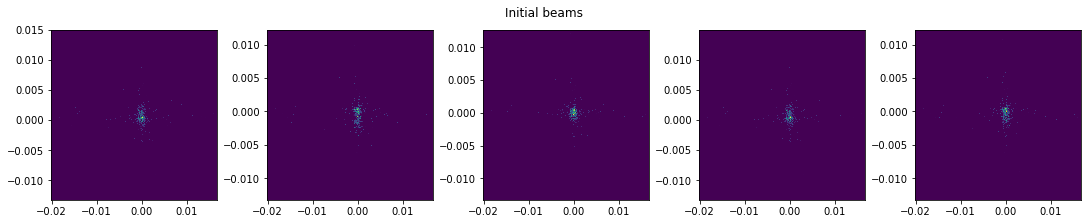

In [22]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(initial_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D)
    
    
fig.suptitle('Initial beams')
fig.savefig(f'{fig_save_path}/initial_beams.png', bbox_inches='tight')

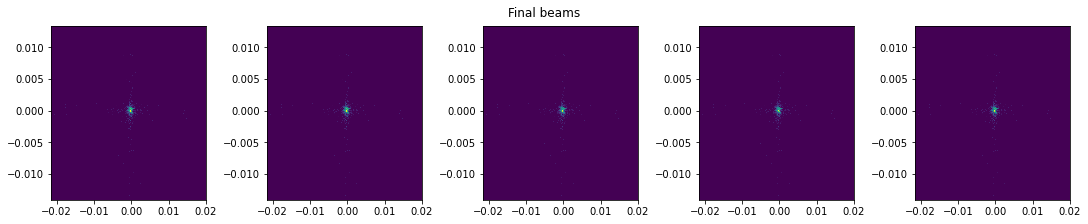

In [131]:
fig, axes = plt.subplots(1, 5, figsize=[15,3], constrained_layout=True)

axes_flat = axes.flatten()
for ix, h in enumerate(final_hists):
    axes_flat[ix].pcolormesh(h.hh, h.vv, h.data_2D)
    
    
fig.suptitle('Final beams')
fig.savefig(f'{fig_save_path}/final_beams.png', bbox_inches='tight')

In [23]:
clean_up()